In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [3]:
from zipfile import ZipFile
import os
import pandas as pd
import csv
import cv2

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
from PIL import Image
import tensorflow as tf
from torch.utils.data import DataLoader, TensorDataset
import torch

# Dataset & CSV

In [ ]:
# # 구글 드라이브에 업로드된 압축 파일 경로
# zip_file_path = '/content/drive/MyDrive/2024prometheus/archive.zip'

# # 압축을 해제할 디렉토리 경로
# extracted_folder_path = '/content/drive/MyDrive/2024prometheus'

# # 압축 파일 해제
# with ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_folder_path)

# # 압축 해제 후의 파일 목록 출력
# extracted_files = os.listdir(extracted_folder_path)
# print("파일 목록:", extracted_files)

In [ ]:
directory_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/test'
file_list = os.listdir(directory_path)

print("디렉토리 내의 파일 목록:")
for file_name in file_list:
    print(file_name)

diseases_list = [file_name for file_name in file_list]
print(diseases_list)

디렉토리 내의 파일 목록:
Alopecia Areata
Contact Dermatitis
Folliculitis
Head Lice
Lichen Planus
Male Pattern Baldness
Psoriasis
Seborrheic Dermatitis
Telogen Effluvium
Tinea Capitis
['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice', 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis', 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']


In [ ]:
# 특정 디렉토리 경로
for d in diseases_list:
  train_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/train/'+ d
  test_path =  '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/test/'+ d
  val_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/val/'+ d

  # 디렉토리 내의 파일 목록을 가져옴
  file_list1 = os.listdir(train_path)
  file_list2 = os.listdir(test_path)
  file_list3 = os.listdir(val_path)

  # 파일 개수 출력
  file_count1 = len(file_list1)
  file_count2 = len(file_list2)
  file_count3 = len(file_list3)
  print(f"train_'{d}' 디렉토리에 있는 파일 개수: {file_count1}")
  print(f"test_'{d}' 디렉토리에 있는 파일 개수: {file_count2}")
  print(f"val_'{d}' 디렉토리에 있는 파일 개수: {file_count3}")

train_'Alopecia Areata' 디렉토리에 있는 파일 개수: 960
test_'Alopecia Areata' 디렉토리에 있는 파일 개수: 120
val_'Alopecia Areata' 디렉토리에 있는 파일 개수: 120
train_'Contact Dermatitis' 디렉토리에 있는 파일 개수: 960
test_'Contact Dermatitis' 디렉토리에 있는 파일 개수: 120
val_'Contact Dermatitis' 디렉토리에 있는 파일 개수: 120
train_'Folliculitis' 디렉토리에 있는 파일 개수: 960
test_'Folliculitis' 디렉토리에 있는 파일 개수: 120
val_'Folliculitis' 디렉토리에 있는 파일 개수: 120
train_'Head Lice' 디렉토리에 있는 파일 개수: 960
test_'Head Lice' 디렉토리에 있는 파일 개수: 120
val_'Head Lice' 디렉토리에 있는 파일 개수: 120
train_'Lichen Planus' 디렉토리에 있는 파일 개수: 960
test_'Lichen Planus' 디렉토리에 있는 파일 개수: 120
val_'Lichen Planus' 디렉토리에 있는 파일 개수: 120
train_'Male Pattern Baldness' 디렉토리에 있는 파일 개수: 960
test_'Male Pattern Baldness' 디렉토리에 있는 파일 개수: 120
val_'Male Pattern Baldness' 디렉토리에 있는 파일 개수: 120
train_'Psoriasis' 디렉토리에 있는 파일 개수: 960
test_'Psoriasis' 디렉토리에 있는 파일 개수: 120
val_'Psoriasis' 디렉토리에 있는 파일 개수: 120
train_'Seborrheic Dermatitis' 디렉토리에 있는 파일 개수: 960
test_'Seborrheic Dermatitis' 디렉토리에 있는 파일 개수: 120
val_'Seborrheic Dermat

train data : 각 960개, test data : 각 120개, val data : 각 120개


총 9600 + 1200 + 1200 = 12000개 데이터셋

In [ ]:
# # 디렉토리 경로
# directory_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/train'

# # CSV 파일 경로
# csv_file_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/train_images.csv'

# # 질병 리스트
# disease_list = ['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice',
#                 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis',
#                 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']

# # CSV 파일을 작성할 때 사용할 헤더
# csv_header = ['File Name'] + disease_list

# # CSV 파일 열기
# with open(csv_file_path, 'w', newline='') as csv_file:
#     csv_writer = csv.writer(csv_file)

#     # 헤더 작성
#     csv_writer.writerow(csv_header)

#     # 디렉토리 순회
#     for disease_folder in os.listdir(directory_path):
#         disease_path = os.path.join(directory_path, disease_folder)

#         # 디렉토리인지 확인하고 jpg 파일 수집
#         if os.path.isdir(disease_path):
#             for file_name in os.listdir(disease_path):
#                 if file_name.endswith('.jpg'):
#                     # 파일명에서 .jpg 제거 후 기록
#                     row = [file_name[:-4]] + [1 if disease_folder == disease else 0 for disease in disease_list]
#                     csv_writer.writerow(row)

# print(f"CSV 파일이 생성되었습니다. 경로: {csv_file_path}")

In [ ]:
# 생성된 CSV 파일의 경로
csv_train_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/train_images.csv'

# CSV 파일 읽기
df_train = pd.read_csv(csv_train_path)

df_train

,File Name,Alopecia Areata,Contact Dermatitis,Folliculitis,Head Lice,Lichen Planus,Male Pattern Baldness,Psoriasis,Seborrheic Dermatitis,Telogen Effluvium,Tinea Capitis
0,alopecia_areata_0002,1,0,0,0,0,0,0,0,0,0
1,alopecia_areata_0003,1,0,0,0,0,0,0,0,0,0
2,alopecia_areata_0004,1,0,0,0,0,0,0,0,0,0
3,alopecia_areata_0005,1,0,0,0,0,0,0,0,0,0
4,alopecia_areata_0007,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9595,tinea_capitis_1196,0,0,0,0,0,0,0,0,0,1
9596,tinea_capitis_1197,0,0,0,0,0,0,0,0,0,1
9597,tinea_capitis_1198,0,0,0,0,0,0,0,0,0,1
9598,tinea_capitis_1199,0,0,0,0,0,0,0,0,0,1


-> train csv 파일 생성

In [ ]:
# # 디렉토리 경로
# directory_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/val'

# # CSV 파일 경로
# csv_file_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/val_images.csv'

# # 질병 리스트
# disease_list = ['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice',
#                 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis',
#                 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']

# # CSV 파일을 작성할 때 사용할 헤더
# csv_header = ['File Name'] + disease_list

# # CSV 파일 열기
# with open(csv_file_path, 'w', newline='') as csv_file:
#     csv_writer = csv.writer(csv_file)

#     # 헤더 작성
#     csv_writer.writerow(csv_header)

#     # 디렉토리 순회
#     for disease_folder in os.listdir(directory_path):
#         disease_path = os.path.join(directory_path, disease_folder)

#         # 디렉토리인지 확인하고 jpg 파일 수집
#         if os.path.isdir(disease_path):
#             for file_name in os.listdir(disease_path):
#                 if file_name.endswith('.jpg'):
#                     # 파일명에서 .jpg 제거 후 기록
#                     row = [file_name[:-4]] + [1 if disease_folder == disease else 0 for disease in disease_list]
#                     csv_writer.writerow(row)

# print(f"CSV 파일이 생성되었습니다. 경로: {csv_file_path}")

In [ ]:
# 생성된 CSV 파일의 경로
csv_val_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/val_images.csv'

# CSV 파일 읽기
df_val = pd.read_csv(csv_val_path)

df_val

,File Name,Alopecia Areata,Contact Dermatitis,Folliculitis,Head Lice,Lichen Planus,Male Pattern Baldness,Psoriasis,Seborrheic Dermatitis,Telogen Effluvium,Tinea Capitis
0,alopecia_areata_0001,1,0,0,0,0,0,0,0,0,0
1,alopecia_areata_0006,1,0,0,0,0,0,0,0,0,0
2,alopecia_areata_0016,1,0,0,0,0,0,0,0,0,0
3,alopecia_areata_0029,1,0,0,0,0,0,0,0,0,0
4,alopecia_areata_0033,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,tinea_capitis_1151,0,0,0,0,0,0,0,0,0,1
1196,tinea_capitis_1173,0,0,0,0,0,0,0,0,0,1
1197,tinea_capitis_1177,0,0,0,0,0,0,0,0,0,1
1198,tinea_capitis_1185,0,0,0,0,0,0,0,0,0,1


-> validation csv 파일 생성

In [ ]:
# # 디렉토리 경로
# directory_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/test'

# # CSV 파일 경로
# csv_file_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/test_images.csv'

# # 질병 리스트
# disease_list = ['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice',
#                 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis',
#                 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']

# # CSV 파일을 작성할 때 사용할 헤더
# csv_header = ['File Name'] + disease_list

# # CSV 파일 열기
# with open(csv_file_path, 'w', newline='') as csv_file:
#     csv_writer = csv.writer(csv_file)

#     # 헤더 작성
#     csv_writer.writerow(csv_header)

#     # 디렉토리 순회
#     for disease_folder in os.listdir(directory_path):
#         disease_path = os.path.join(directory_path, disease_folder)

#         # 디렉토리인지 확인하고 jpg 파일 수집
#         if os.path.isdir(disease_path):
#             for file_name in os.listdir(disease_path):
#                 if file_name.endswith('.jpg'):
#                     # 파일명에서 .jpg 제거 후 기록
#                     row = [file_name[:-4]] + [1 if disease_folder == disease else 0 for disease in disease_list]
#                     csv_writer.writerow(row)

# print(f"CSV 파일이 생성되었습니다. 경로: {csv_file_path}")

In [ ]:
# 생성된 CSV 파일의 경로
csv_test_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/test_images.csv'

# CSV 파일 읽기
df_test = pd.read_csv(csv_test_path)

df_test

,File Name,Alopecia Areata,Contact Dermatitis,Folliculitis,Head Lice,Lichen Planus,Male Pattern Baldness,Psoriasis,Seborrheic Dermatitis,Telogen Effluvium,Tinea Capitis
0,alopecia_areata_0026,1,0,0,0,0,0,0,0,0,0
1,alopecia_areata_0036,1,0,0,0,0,0,0,0,0,0
2,alopecia_areata_0037,1,0,0,0,0,0,0,0,0,0
3,alopecia_areata_0051,1,0,0,0,0,0,0,0,0,0
4,alopecia_areata_0062,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,tinea_capitis_1147,0,0,0,0,0,0,0,0,0,1
1196,tinea_capitis_1154,0,0,0,0,0,0,0,0,0,1
1197,tinea_capitis_1162,0,0,0,0,0,0,0,0,0,1
1198,tinea_capitis_1170,0,0,0,0,0,0,0,0,0,1


-> test csv 파일 생성

# Data Preprocessing

In [ ]:
# IMG_SIZE = 256
# base_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/'

# # 질병 리스트
# disease_list = ['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice',
#                 'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis',
#                 'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']

# # Function to process images and labels
# def process_data(path, disease_list):
#     data = []
#     labels = []

#     for disease_folder in os.listdir(path):
#         disease_path = os.path.join(path, disease_folder)

#         if os.path.isdir(disease_path):
#             for file_name in os.listdir(disease_path):
#                 if file_name.endswith('.jpg'):
#                     img_path = os.path.join(disease_path, file_name)
#                     img = Image.open(img_path)
#                     img = img.resize((IMG_SIZE, IMG_SIZE))
#                     img_np = np.array(img)
#                     median_filtered_image = cv2.medianBlur(img_np, 3)
#                     one_img = np.asarray(np.float32(median_filtered_image))
#                     norm_img = one_img / 255.0

#                     data.append(norm_img)

#                     label = [1.0 if disease_folder == disease else 0.0 for disease in disease_list]
#                     labels.append(label)

#     return data, labels

In [ ]:
# # Process training data
# train_path = os.path.join(base_path, 'train')
# train_data, train_labels = process_data(train_path, disease_list)

# # Process test data
# test_path = os.path.join(base_path, 'test')
# test_data, test_labels = process_data(test_path, disease_list)

# # Combine training and test data and labels
# data = np.concatenate((train_data, test_data), axis=0)
# labels = np.concatenate((train_labels, test_labels), axis=0)

# # Display combined shapes
# print("Combined Data shape:", data.shape)
# print("Combined Labels shape:", labels.shape)

In [ ]:
IMG_SIZE = 256
train_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/train'

data = []
labels = []

# 질병 리스트
disease_list = ['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice',
                'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis',
                'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis']

for disease_folder in os.listdir(train_path):
    disease_path = os.path.join(train_path, disease_folder)

    # 디렉토리인지 확인하고 jpg 파일 수집
    if os.path.isdir(disease_path):
        for file_name in os.listdir(disease_path):
            if file_name.endswith('.jpg'):
                # 이미지 읽기
                img_path = os.path.join(disease_path, file_name)
                img = Image.open(img_path)
                # 이미지 리사이즈
                img = img.resize((IMG_SIZE, IMG_SIZE))
                # PIL 이미지를 numpy 배열로 변환
                img_np = np.array(img)
                # 노이즈 제거
                median_filtered_image = cv2.medianBlur(img_np, 3)
                one_img = np.asarray(np.float32(median_filtered_image))
                norm_img = one_img / 255.0

                # 데이터에 추가
                data.append(norm_img)

                # 레이블 추가
                label = [1 if disease_folder == disease else 0 for disease in disease_list]
                labels.append(label)  # 1차원 리스트로 변경

# 데이터와 레이블을 numpy 배열로 변환
data = np.array(data)
labels = np.array(labels)

# 데이터 확인
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (9600, 256, 256, 3)
Labels shape: (9600, 10)


In [ ]:
data = data.transpose((0, 3, 1, 2))

In [ ]:
# 데이터 확인
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (9600, 3, 256, 256)
Labels shape: (9600, 10)


In [ ]:
val_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/val'

val_data = []
val_labels = []

for disease_folder in os.listdir(val_path):
    disease_path = os.path.join(val_path, disease_folder)

    # 디렉토리인지 확인하고 jpg 파일 수집
    if os.path.isdir(disease_path):
        for file_name in os.listdir(disease_path):
            if file_name.endswith('.jpg'):
                # 이미지 읽기
                img_path = os.path.join(disease_path, file_name)
                img = Image.open(img_path)
                # 이미지 리사이즈
                img = img.resize((IMG_SIZE, IMG_SIZE))
                # PIL 이미지를 numpy 배열로 변환
                img_np = np.array(img)
                # 노이즈 제거
                median_filtered_image = cv2.medianBlur(img_np, 3)
                one_img = np.asarray(np.float32(median_filtered_image))
                norm_img = one_img / 255.0

                # 데이터에 추가
                val_data.append(norm_img)

                # 레이블 추가
                label = [1 if disease_folder == disease else 0 for disease in disease_list]
                val_labels.append(label)  # 1차원 리스트로 변경


# 데이터와 레이블을 numpy 배열로 변환
val_data = np.array(val_data)
val_labels = np.array(val_labels)

# 데이터 확인
print("Validation Data shape:", val_data.shape)
print("Validation Labels shape:", val_labels.shape)

Validation Data shape: (1200, 256, 256, 3)
Validation Labels shape: (1200, 10)


In [ ]:
val_data = val_data.transpose((0, 3, 1, 2))

In [ ]:
# 데이터 확인
print("Validation Data shape:", val_data.shape)
print("Validation Labels shape:", val_labels.shape)

Validation Data shape: (1200, 3, 256, 256)
Validation Labels shape: (1200, 10)


In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels):
        self.data = np.array(data)
        self.labels = [label.tolist() for label in labels]

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        images = torch.FloatTensor(self.data[idx])
        labels = torch.FloatTensor(self.labels[idx])

        return images, labels.squeeze(0)  # 2차원에서 1차원으로 변경

In [ ]:
# 데이터셋 인스턴스 생성
train_dataset = CustomDataset(data, labels)
val_dataset = CustomDataset(val_data, val_labels)

# DataLoader 생성
batch_size_train = 64
batch_size_val = 8

train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size_val, shuffle=False)

# Model architecture & Train

In [5]:
!pip install torchsummaryX

In [6]:
!pip install torchsummary --upgrade

In [7]:
!pip install pretrainedmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=fe97899efa272093925351e6ca872fe849bf45640acd9a2fe4c677d674765160
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built pretrainedmodels


In [8]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.6 MB/s eta 0:00:00


In [9]:
# PyTorch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.optim import lr_scheduler
from torchvision import utils
from torchsummary import summary
from torchsummaryX import summary
from torchvision.models import resnet50
from torchvision.models import resnet101

In [ ]:
class MultiBinaryClassificationModel(nn.Module):
    def __init__(self, num_classes=10) -> None:
        super(MultiBinaryClassificationModel, self).__init__()
        self.resnet = resnet50(pretrained=True)
        # 다중 이진 분류를 위한 출력 레이어 - 뉴런 수를 클래스의 개수에 맞게 조정하고 Sigmoid 적용
        self.classifier = nn.Linear(1000, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.resnet(x)
        x = self.classifier(x)
        x = self.sigmoid(x)  # Sigmoid 적용

        return x

In [ ]:
# 모델 인스턴스 생성
num_classes = 10  # 클래스 개수에 맞게 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiBinaryClassificationModel(num_classes=num_classes).to(device)

# 입력 데이터 생성
input_data = torch.randn((1, 3, 256, 256)).to(device)  # (배치 크기, 채널 수, 높이, 너비)

# 모델 요약 출력
summary(model, input_data)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 183MB/s]


                                                    Kernel Shape  \
Layer                                                              
0_resnet.Conv2d_conv1                              [3, 64, 7, 7]   
1_resnet.BatchNorm2d_bn1                                    [64]   
2_resnet.ReLU_relu                                             -   
3_resnet.MaxPool2d_maxpool                                     -   
4_resnet.layer1.0.Conv2d_conv1                    [64, 64, 1, 1]   
5_resnet.layer1.0.BatchNorm2d_bn1                           [64]   
6_resnet.layer1.0.ReLU_relu                                    -   
7_resnet.layer1.0.Conv2d_conv2                    [64, 64, 3, 3]   
8_resnet.layer1.0.BatchNorm2d_bn2                           [64]   
9_resnet.layer1.0.ReLU_relu                                    -   
10_resnet.layer1.0.Conv2d_conv3                  [64, 256, 1, 1]   
11_resnet.layer1.0.BatchNorm2d_bn3                         [256]   
12_resnet.layer1.0.downsample.Conv2d_0          

/usr/local/lib/python3.10/dist-packages/torchsummaryX/torchsummaryX.py:101: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_resnet.Conv2d_conv1,"[3, 64, 7, 7]","[1, 64, 128, 128]",9408.0,154140672.0
1_resnet.BatchNorm2d_bn1,[64],"[1, 64, 128, 128]",128.0,64.0
2_resnet.ReLU_relu,-,"[1, 64, 128, 128]",NaN,NaN
3_resnet.MaxPool2d_maxpool,-,"[1, 64, 64, 64]",NaN,NaN
4_resnet.layer1.0.Conv2d_conv1,"[64, 64, 1, 1]","[1, 64, 64, 64]",4096.0,16777216.0
...,...,...,...,...
155_resnet.layer4.2.ReLU_relu,-,"[1, 2048, 8, 8]",NaN,NaN
156_resnet.AdaptiveAvgPool2d_avgpool,-,"[1, 2048, 1, 1]",NaN,NaN
157_resnet.Linear_fc,"[2048, 1000]","[1, 1000]",2049000.0,2048000.0


In [ ]:
torch.cuda.empty_cache()

In [ ]:
# Training
def run_train(model):
    model.train()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    total_loss = 0
    correct = 0
    incorrect = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        predictions = outputs > 0.5
        correct += (predictions == labels).sum().item()
        incorrect += (predictions != labels).sum().item()

    accuracy = correct / (correct + incorrect)
    average_loss = total_loss / len(train_loader)

    return accuracy, average_loss, predictions, labels

# Validation
def run_valid(model):
    model.eval()
    criterion = nn.MSELoss()

    total_loss = 0
    correct = 0
    incorrect = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            predictions = outputs > 0.5
            correct += (predictions == labels).sum().item()
            incorrect += (predictions != labels).sum().item()

    accuracy = correct / (correct + incorrect)
    average_loss = total_loss / len(val_loader)

    return accuracy, average_loss, predictions, labels

***START EPOCH***
# Epoch: 1 / 100
Train Accuracy: 0.9459479166666667
Validation Accuracy: 0.9429166666666666
# Epoch: 2 / 100
Train Accuracy: 0.98046875
Validation Accuracy: 0.96825
# Epoch: 3 / 100
Train Accuracy: 0.9878333333333333
Validation Accuracy: 0.90475
# Epoch: 4 / 100
Train Accuracy: 0.99171875
Validation Accuracy: 0.9111666666666667
# Epoch: 5 / 100
Train Accuracy: 0.9925416666666667
Validation Accuracy: 0.9765


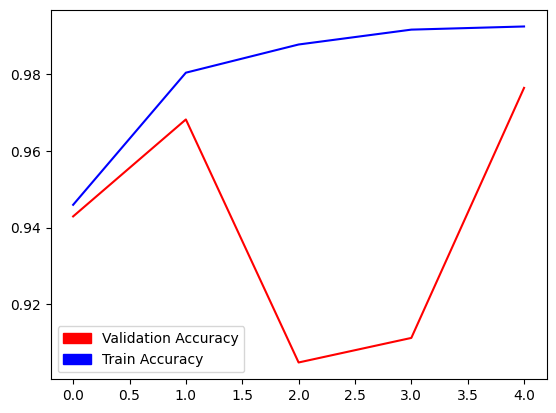

# Epoch: 6 / 100
Train Accuracy: 0.9926666666666667
Validation Accuracy: 0.9806666666666667
# Epoch: 7 / 100
Train Accuracy: 0.9954583333333333
Validation Accuracy: 0.97775
# Epoch: 8 / 100
Train Accuracy: 0.9953333333333333
Validation Accuracy: 0.9956666666666667
# Epoch: 9 / 100
Train Accuracy: 0.9959583333333333
Validation Accuracy: 0.998
# Epoch: 10 / 100
Train Accuracy: 0.9967604166666667
Validation Accuracy: 0.9948333333333333


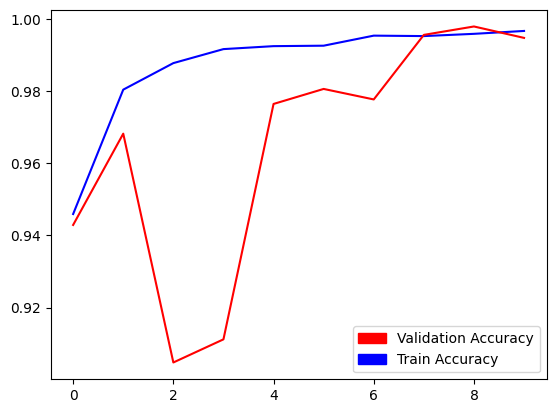

# Epoch: 11 / 100
Train Accuracy: 0.9969583333333333
Validation Accuracy: 0.9855833333333334
# Epoch: 12 / 100
Train Accuracy: 0.9971666666666666
Validation Accuracy: 0.9746666666666667
# Epoch: 13 / 100
Train Accuracy: 0.9970104166666667
Validation Accuracy: 0.9755
# Epoch: 14 / 100
Train Accuracy: 0.9964375
Validation Accuracy: 0.9631666666666666
# Epoch: 15 / 100
Train Accuracy: 0.9975833333333334
Validation Accuracy: 0.9964166666666666


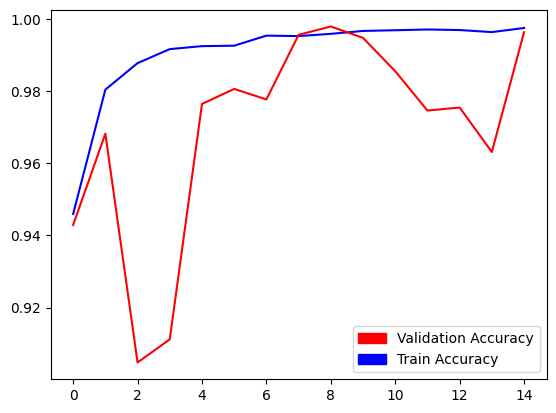

# Epoch: 16 / 100
Train Accuracy: 0.9982916666666667
Validation Accuracy: 0.9943333333333333
# Epoch: 17 / 100
Train Accuracy: 0.9979583333333333
Validation Accuracy: 0.997
# Epoch: 18 / 100
Train Accuracy: 0.99784375
Validation Accuracy: 0.99825
# Epoch: 19 / 100
Train Accuracy: 0.9975104166666666
Validation Accuracy: 0.9429166666666666
# Epoch: 20 / 100
Train Accuracy: 0.9980208333333334
Validation Accuracy: 0.9975833333333334


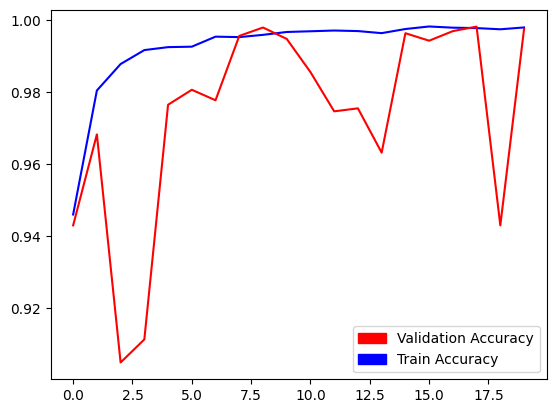

# Epoch: 21 / 100
Train Accuracy: 0.9981770833333333
Validation Accuracy: 0.9998333333333334
# Epoch: 22 / 100
Train Accuracy: 0.9979166666666667
Validation Accuracy: 0.9736666666666667
# Epoch: 23 / 100
Train Accuracy: 0.99853125
Validation Accuracy: 0.9965
# Epoch: 24 / 100
Train Accuracy: 0.9978333333333333
Validation Accuracy: 0.98875
# Epoch: 25 / 100
Train Accuracy: 0.9983020833333334
Validation Accuracy: 0.9921666666666666


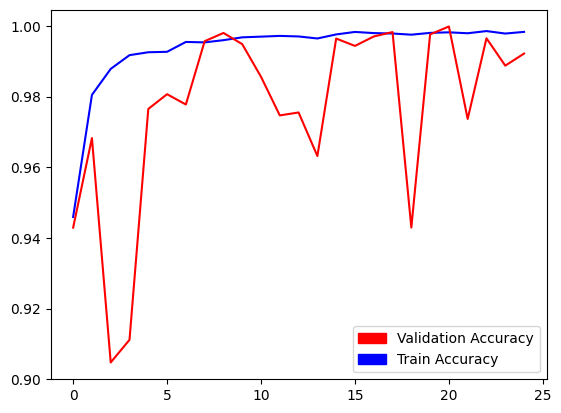

# Epoch: 26 / 100
Train Accuracy: 0.9983854166666667
Validation Accuracy: 0.9963333333333333
# Epoch: 27 / 100
Train Accuracy: 0.9984791666666667
Validation Accuracy: 0.9995833333333334
# Epoch: 28 / 100
Train Accuracy: 0.99859375
Validation Accuracy: 0.9854166666666667
# Epoch: 29 / 100
Train Accuracy: 0.99846875
Validation Accuracy: 0.99675
# Epoch: 30 / 100
Train Accuracy: 0.9988020833333333
Validation Accuracy: 0.96675


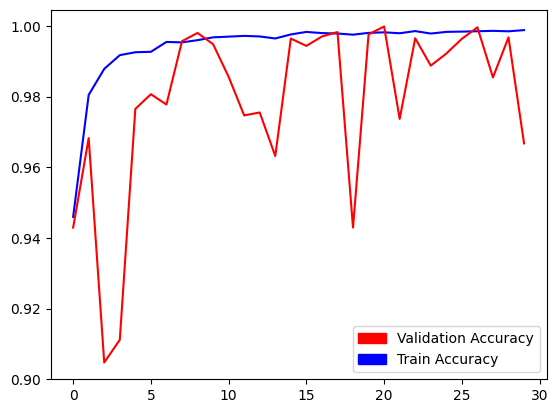

# Epoch: 31 / 100
Train Accuracy: 0.9990833333333333
Validation Accuracy: 0.9895
Early stopping. No improvement in validation accuracy for 10 epochs.
Best Validation Accuracy: 0.9998333333333334 achieved at epoch 20


In [ ]:
best_accuracy = 0
best_epoch = 0

# Learning
acc_t = []
acc_v = []
prediction_v = []
label_v = []

epoch = 100  # Number of epochs
patience = 10  # Number of epochs to wait for improvement
counter = 0  # Counter for early stopping

print('***START EPOCH***')

for E in range(epoch):
    print('# Epoch: {} / {}'.format(E+1, epoch))
    accuracy_t, loss_t, pred_t, truth_t = run_train(model)
    accuracy_v, loss_v, pred_v, truth_v = run_valid(model)
    prediction_v.append(pred_v)
    label_v.append(truth_v)

    print('Train Accuracy: {}'.format(accuracy_t))
    print('Validation Accuracy: {}'.format(accuracy_v))
    acc_t.append(accuracy_t)
    acc_v.append(accuracy_v)

    if accuracy_v > best_accuracy:
        best_accuracy = accuracy_v
        best_epoch = E
        # Save the model
        torch.save(model, 'best_model.pth')
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print('Early stopping. No improvement in validation accuracy for {} epochs.'.format(patience))
        break

    if (E+1) % 5 == 0:
        plt.plot(range(len(acc_t)), acc_t, 'b', range(len(acc_v)), acc_v, 'r')
        blue_patch = mpatches.Patch(color='blue', label='Train Accuracy')
        red_patch = mpatches.Patch(color='red', label='Validation Accuracy')
        plt.legend(handles=[red_patch, blue_patch])
        plt.show()

print('Best Validation Accuracy: {} achieved at epoch {}'.format(best_accuracy, best_epoch))

In [ ]:
torch.save(model,'/content/drive/MyDrive/2024prometheus/multi_best_model.pth')

# TEST CODE

In [10]:
# test_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/input/user_image.jpg'
test_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/test'

In [ ]:
# IMG_SIZE = 256

# test_data = []

# # 이미지 읽기
# img = Image.open(test_path)
# # 이미지 리사이즈
# img = img.resize((IMG_SIZE, IMG_SIZE))
# # PIL 이미지를 numpy 배열로 변환
# img_np = np.array(img)
# # 노이즈 제거
# median_filtered_image = cv2.medianBlur(img_np, 3)
# one_img = np.asarray(np.float32(median_filtered_image))
# norm_img = one_img / 255.0

# # 데이터에 추가
# test_data.append(norm_img)

# # 테스트 데이터를 numpy 배열로 변환
# test_data = np.array(test_data)

# # 테스트 데이터 확인
# print("Test Data shape:", test_data.shape)

In [11]:
IMG_SIZE = 256

test_data = []

for disease_folder in os.listdir(test_path):
    disease_path = os.path.join(test_path, disease_folder)

    # 디렉토리인지 확인하고 jpg 파일 수집
    if os.path.isdir(disease_path):
        for file_name in os.listdir(disease_path):
            if file_name.endswith('.jpg'):
                # 이미지 읽기
                img_path = os.path.join(disease_path, file_name)
                img = Image.open(img_path)
                # 이미지 리사이즈
                img = img.resize((IMG_SIZE, IMG_SIZE))
                # PIL 이미지를 numpy 배열로 변환
                img_np = np.array(img)
                # 노이즈 제거
                median_filtered_image = cv2.medianBlur(img_np, 3)
                one_img = np.asarray(np.float32(median_filtered_image))
                norm_img = one_img / 255.0

                # 데이터에 추가
                test_data.append(norm_img)

# 테스트 데이터를 numpy 배열로 변환
test_data = np.array(test_data)

# 테스트 데이터 확인
print("Test Data shape:", test_data.shape)

Test Data shape: (1200, 256, 256, 3)


In [12]:
test_data = test_data.transpose((0, 3, 1, 2))

In [13]:
# 데이터 확인
print("Test Data shape:", test_data.shape)

Test Data shape: (1200, 3, 256, 256)


In [14]:
model_path = '/content/drive/MyDrive/2024prometheus/multi_best_model.pth'

In [15]:
# 모델 정의
class MultiBinaryClassificationModel(nn.Module):
    def __init__(self, num_classes=10) -> None:
        super(MultiBinaryClassificationModel, self).__init__()
        self.resnet = resnet50(pretrained=True)
        # 다중 이진 분류를 위한 출력 레이어 - 뉴런 수를 클래스의 개수에 맞게 조정하고 Sigmoid 적용
        self.classifier = nn.Linear(1000, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.resnet(x)
        x = self.classifier(x)
        x = self.sigmoid(x)  # Sigmoid 적용

        return x

# 현재 사용 가능한 디바이스 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 테스트 데이터를 모델 입력 형식에 맞게 변환
test_tensor = torch.from_numpy(test_data).float().to(device)

# 모델 불러오기
loaded_model = torch.load(model_path, map_location=device)
loaded_model.eval()

# 모델과 입력 데이터를 동일한 디바이스로 이동
loaded_model = loaded_model.to(device)

In [ ]:
# predictions_list = []

# for disease_folder in os.listdir(test_path):
#     disease_path = os.path.join(test_path, disease_folder)

#     if os.path.isdir(disease_path):
#         for file_name in os.listdir(disease_path):
#             if file_name.endswith('.jpg'):
#                 img_path = os.path.join(disease_path, file_name)
#                 img = Image.open(img_path)
#                 img = img.resize((IMG_SIZE, IMG_SIZE))
#                 img_np = np.array(img)
#                 median_filtered_image = cv2.medianBlur(img_np, 3)
#                 one_img = np.asarray(np.float32(median_filtered_image))
#                 norm_img = one_img / 255.0
#                 test_data = np.array([norm_img])
#                 test_data = test_data.transpose((0, 3, 1, 2))
#                 test_tensor = torch.from_numpy(test_data).float().to(device)

#                 with torch.no_grad():
#                     outputs = loaded_model(test_tensor)

#                 predictions = outputs.cpu().numpy()
#                 predictions_list.append(predictions)

# predictions_array = np.concatenate(predictions_list, axis=0)

# # 결과를 DataFrame으로 변환
# df = pd.DataFrame(predictions_array, columns=['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice',
#                                               'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis',
#                                               'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis'])

# # 이미지 파일 경로 추가
# image_paths = [os.path.join(disease_path, file_name) for disease_folder in os.listdir(test_path) for file_name in os.listdir(os.path.join(test_path, disease_folder)) if file_name.endswith('.jpg')]
# df.insert(0, 'Image_Path', image_paths)

# # DataFrame을 CSV 파일로 저장
# csv_file_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/predictions.csv'
# df.to_csv(csv_file_path, index=False)

# # 저장된 CSV 파일 확인
# print(f"예측 결과가 다음 경로에 저장되었습니다: {csv_file_path}")

예측 결과가 다음 경로에 저장되었습니다: /content/drive/MyDrive/2024prometheus/Hair Diseases - Final/predictions.csv


In [16]:
predictions_list = []

# Set the threshold value
threshold = 0.5

for disease_folder in os.listdir(test_path):
    disease_path = os.path.join(test_path, disease_folder)

    if os.path.isdir(disease_path):
        for file_name in os.listdir(disease_path):
            if file_name.endswith('.jpg'):
                img_path = os.path.join(disease_path, file_name)
                img = Image.open(img_path)
                img = img.resize((IMG_SIZE, IMG_SIZE))
                img_np = np.array(img)
                median_filtered_image = cv2.medianBlur(img_np, 3)
                one_img = np.asarray(np.float32(median_filtered_image))
                norm_img = one_img / 255.0
                test_data = np.array([norm_img])
                test_data = test_data.transpose((0, 3, 1, 2))
                test_tensor = torch.from_numpy(test_data).float().to(device)

                with torch.no_grad():
                    outputs = loaded_model(test_tensor)

                predictions = (outputs.cpu().numpy() > threshold).astype(int)  # Apply thresholding
                predictions_list.append(predictions)

# Combine predictions into a numpy array
predictions_array = np.concatenate(predictions_list, axis=0)

# Create a DataFrame
df = pd.DataFrame(predictions_array, columns=['Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice',
                                              'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis',
                                              'Seborrheic Dermatitis', 'Telogen Effluvium', 'Tinea Capitis'])

# Add image file paths to the DataFrame
image_paths = [os.path.join(disease_path, file_name) for disease_folder in os.listdir(test_path) for file_name in os.listdir(os.path.join(test_path, disease_folder)) if file_name.endswith('.jpg')]
df.insert(0, 'Image_Path', image_paths)

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/predictions.csv'
df.to_csv(csv_file_path, index=False)

# Display the path to the saved CSV file
print(f"Predictions are saved at the following path: {csv_file_path}")

Predictions are saved at the following path: /content/drive/MyDrive/2024prometheus/Hair Diseases - Final/predictions.csv


In [17]:
# 생성된 CSV 파일의 경로
csv_pred_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/predictions.csv'

# CSV 파일 읽기
df_pred = pd.read_csv(csv_pred_path)

df_pred

,Image_Path,Alopecia Areata,Contact Dermatitis,Folliculitis,Head Lice,Lichen Planus,Male Pattern Baldness,Psoriasis,Seborrheic Dermatitis,Telogen Effluvium,Tinea Capitis
0,/content/drive/MyDrive/2024prometheus/Hair Dis...,1,0,0,0,0,0,0,0,0,0
1,/content/drive/MyDrive/2024prometheus/Hair Dis...,1,0,0,0,0,0,0,0,0,0
2,/content/drive/MyDrive/2024prometheus/Hair Dis...,1,0,0,0,0,0,0,0,0,0
3,/content/drive/MyDrive/2024prometheus/Hair Dis...,1,0,0,0,0,0,0,0,0,0
4,/content/drive/MyDrive/2024prometheus/Hair Dis...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,/content/drive/MyDrive/2024prometheus/Hair Dis...,0,0,0,0,0,0,0,0,0,1
1196,/content/drive/MyDrive/2024prometheus/Hair Dis...,0,0,0,0,0,0,0,0,0,1
1197,/content/drive/MyDrive/2024prometheus/Hair Dis...,0,0,0,0,0,0,0,0,0,1
1198,/content/drive/MyDrive/2024prometheus/Hair Dis...,0,0,0,0,0,0,0,0,0,1


In [18]:
# 생성된 CSV 파일의 경로
csv_test_path = '/content/drive/MyDrive/2024prometheus/Hair Diseases - Final/test_images.csv'

# CSV 파일 읽기
df_test = pd.read_csv(csv_test_path)

df_test

,File Name,Alopecia Areata,Contact Dermatitis,Folliculitis,Head Lice,Lichen Planus,Male Pattern Baldness,Psoriasis,Seborrheic Dermatitis,Telogen Effluvium,Tinea Capitis
0,alopecia_areata_0026,1,0,0,0,0,0,0,0,0,0
1,alopecia_areata_0036,1,0,0,0,0,0,0,0,0,0
2,alopecia_areata_0037,1,0,0,0,0,0,0,0,0,0
3,alopecia_areata_0051,1,0,0,0,0,0,0,0,0,0
4,alopecia_areata_0062,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,tinea_capitis_1147,0,0,0,0,0,0,0,0,0,1
1196,tinea_capitis_1154,0,0,0,0,0,0,0,0,0,1
1197,tinea_capitis_1162,0,0,0,0,0,0,0,0,0,1
1198,tinea_capitis_1170,0,0,0,0,0,0,0,0,0,1


In [19]:
# Load the ground truth (csv_test_path) and predicted labels (csv_pred_path)
df_test = pd.read_csv(csv_test_path)
df_pred = pd.read_csv(csv_pred_path)

# Extract labels from DataFrames
labels_test = df_test.iloc[:, 1:].values  # Assuming labels start from the second column
labels_pred = df_pred.iloc[:, 1:].values  # Assuming labels start from the second column

# Calculate accuracy
correct_predictions = np.sum(labels_test == labels_pred)
total_samples = labels_test.size
accuracy = correct_predictions / total_samples

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.94%
